In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [2]:
df1 = pd.read_csv('data/Bangalore.csv')
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df1.shape

(6207, 40)

In [4]:
df1.groupby('No. of Bedrooms')['No. of Bedrooms'].agg('count')

No. of Bedrooms
1     230
2    2750
3    2799
4     402
5      22
6       2
7       2
Name: No. of Bedrooms, dtype: int64

In [5]:
# Data Cleaning
df2 = df1.drop(['Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'], axis='columns')
df2.head()

,Price,Area,Location,No. of Bedrooms
0,30000000,3340,JP Nagar Phase 1,4
1,7888000,1045,Dasarahalli on Tumkur Road,2
2,4866000,1179,Kannur on Thanisandra Main Road,2
3,8358000,1675,Doddanekundi,3
4,6845000,1670,Kengeri,3


In [6]:
df2['bhk'] = df2['No. of Bedrooms']
df2.drop(['No. of Bedrooms'], axis='columns', inplace=True)

In [7]:
df2.head()

,Price,Area,Location,bhk
0,30000000,3340,JP Nagar Phase 1,4
1,7888000,1045,Dasarahalli on Tumkur Road,2
2,4866000,1179,Kannur on Thanisandra Main Road,2
3,8358000,1675,Doddanekundi,3
4,6845000,1670,Kengeri,3


In [8]:
df2[df2.bhk > 4].head()

,Price,Area,Location,bhk
805,170600000,8331,Hebbal,5
806,182300000,8902,Hebbal,5
807,74300000,5112,Hebbal,5
817,198600000,9700,Hebbal,5
819,202700000,9900,Hebbal,5


In [9]:
#make a copy of the dataframe
df3 = df2.copy()

In [10]:
#calculating price per sqft
df3['Price_per_sqft'] = df3['Price'] / df3['Area']
df3.head(10)

,Price,Area,Location,bhk,Price_per_sqft
0,30000000,3340,JP Nagar Phase 1,4,8982.035928
1,7888000,1045,Dasarahalli on Tumkur Road,2,7548.325359
2,4866000,1179,Kannur on Thanisandra Main Road,2,4127.226463
3,8358000,1675,Doddanekundi,3,4989.850746
4,6845000,1670,Kengeri,3,4098.802395
5,6797000,1220,Horamavu,2,5571.311475
6,20000000,2502,Thanisandra,4,7993.605116
7,7105000,1438,Ramamurthy Nagar,3,4940.890125
8,8405000,1405,Whitefield Hope Farm Junction,3,5982.206406
9,3506000,660,Electronic City Phase 1,1,5312.121212


In [11]:
len(df3.Location.unique())

302

In [12]:
#Finding number of unique locations
df3.Location = df3.Location.apply(lambda x: x.strip())
location_stats = df3.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Electronic City Phase 2    232
RR Nagar                   217
Begur                      186
Varthur                    168
Kumaraswamy Layout         154
                          ... 
Off Cunningham Road          1
OMBR Layout                  1
Nirman Layout                1
Bannerghatta Main Road       1
Murugesh Palya               1
Name: Location, Length: 302, dtype: int64

In [13]:
#Dimensionality Reduction
len(location_stats[location_stats <= 10])


190

In [14]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Location
Kanakapura                 10
Whitefield                 10
Bagaluru Near Yelahanka     9
Kaggadasapura               9
RR Nagar Main Road          9
                           ..
Off Cunningham Road         1
OMBR Layout                 1
Nirman Layout               1
Bannerghatta Main Road      1
Murugesh Palya              1
Name: Location, Length: 190, dtype: int64

In [15]:
#Grouping all the locations with less than 10 data points into 'other' location
df3.Location = df3.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.Location.unique())

113

In [16]:
df3.head()

,Price,Area,Location,bhk,Price_per_sqft
0,30000000,3340,JP Nagar Phase 1,4,8982.035928
1,7888000,1045,Dasarahalli on Tumkur Road,2,7548.325359
2,4866000,1179,Kannur on Thanisandra Main Road,2,4127.226463
3,8358000,1675,Doddanekundi,3,4989.850746
4,6845000,1670,Kengeri,3,4098.802395


In [17]:
df3[df3.Area / df3.bhk < 300].head()

,Price,Area,Location,bhk,Price_per_sqft
1553,4100000,1055,Bommasandra,4,3886.255924
2114,5500000,692,other,3,7947.976879
2115,4600000,692,other,3,6647.398844
4947,2288000,705,CV Raman Nagar,3,3245.390071
5254,8083000,545,Bommasandra,2,14831.192661


In [18]:
df3.shape

(6207, 5)

In [19]:
#Removing lower outliers
df4 = df3[~(df3.Area / df3.bhk < 300)]
df4.shape

(6201, 5)

In [20]:
df4.Price_per_sqft.describe()

count      6201.000000
mean       7067.833245
std       10498.976453
min         432.303408
25%        4038.423645
50%        5367.231638
75%        7241.379310
max      382165.605096
Name: Price_per_sqft, dtype: float64

In [21]:
#Removing outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft > (m-st)) & (subdf.Price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


In [22]:
df5 = remove_pps_outliers(df4)
df5.shape

(5408, 5)

In [23]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.Location == location) & (df.bhk == 2)]
    bhk3 = df[(df.Location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.Area, bhk2.Price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.Area, bhk3.Price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

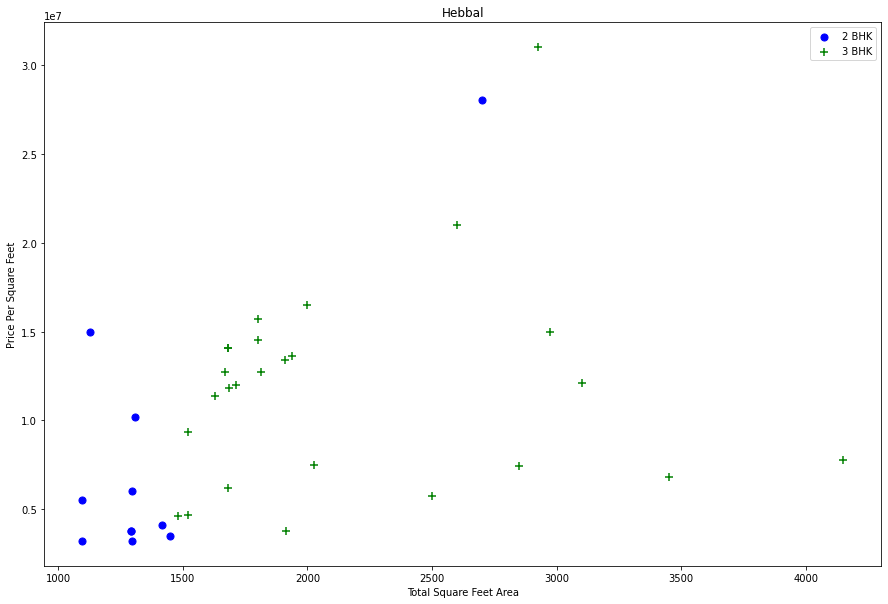

In [26]:
plot_scatter_chart(df5, "Hebbal")

In [27]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [28]:
df6 = remove_bhk_outliers(df5)
df6.shape

(3391, 5)

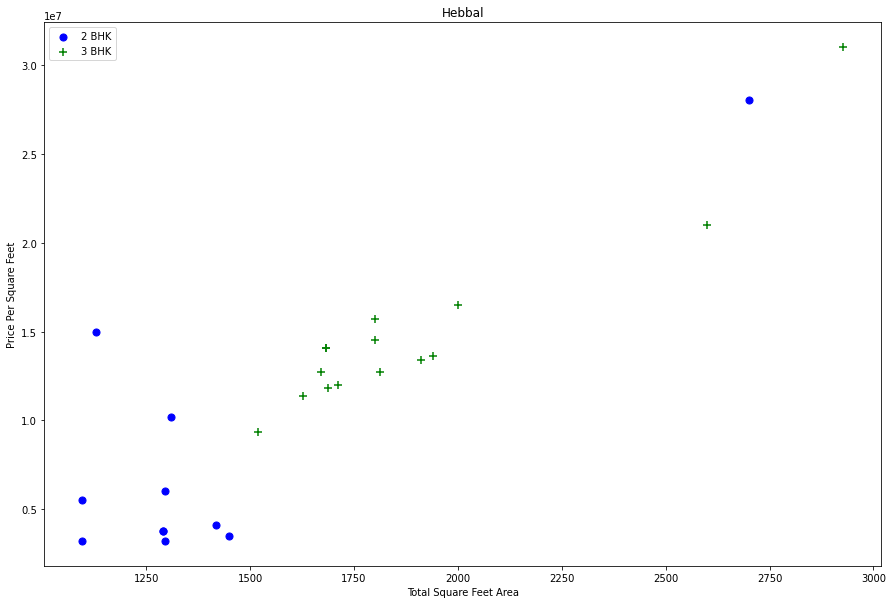

In [30]:
plot_scatter_chart(df6, "Hebbal")

Text(0, 0.5, 'Count')

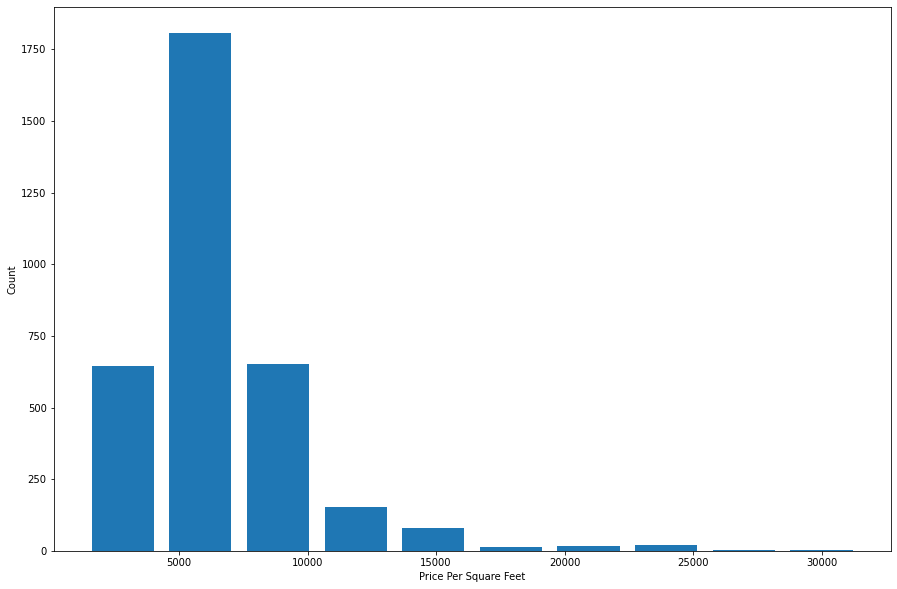

In [31]:
plt.hist(df6.Price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [32]:
df7 = df6.drop(['Price_per_sqft'], axis='columns')
df7.head()

,Price,Area,Location,bhk
0,6700000,1180,5th Phase,2
1,5800000,1185,5th Phase,2
3,8400000,1180,5th Phase,2
4,4876000,1185,5th Phase,2
6,7498999,1180,5th Phase,2


In [34]:
dummies = pd.get_dummies(df7.Location)
dummies.head(3)

,5th Phase,Abbigere,Adugodi,Anagalapura Near Hennur Main Road,Anekal City,Anjanapura,Attibele,Avalahalli Off Sarjapur Road,BEML Layout 5th Stage,BTM Layout,...,Thanisandra Main Road,Uttarahalli,Uttarahalli Hobli,Uttarahalli Main Road,Varthur,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,other,sarjapura attibele road
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df8 = pd.concat([df7, dummies.drop('other', axis='columns')], axis='columns')
df8.head()

,Price,Area,Location,bhk,5th Phase,Abbigere,Adugodi,Anagalapura Near Hennur Main Road,Anekal City,Anjanapura,...,Thanisandra,Thanisandra Main Road,Uttarahalli,Uttarahalli Hobli,Uttarahalli Main Road,Varthur,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,sarjapura attibele road
0,6700000,1180,5th Phase,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5800000,1185,5th Phase,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8400000,1180,5th Phase,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4876000,1185,5th Phase,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7498999,1180,5th Phase,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df9 = df8.drop(['Location'], axis='columns')
df9.head()

,Price,Area,bhk,5th Phase,Abbigere,Adugodi,Anagalapura Near Hennur Main Road,Anekal City,Anjanapura,Attibele,...,Thanisandra,Thanisandra Main Road,Uttarahalli,Uttarahalli Hobli,Uttarahalli Main Road,Varthur,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,sarjapura attibele road
0,6700000,1180,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5800000,1185,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8400000,1180,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4876000,1185,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7498999,1180,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df9.shape

(3391, 115)

In [42]:
X = df9.drop(['Price'], axis='columns')
X.head()

,Area,bhk,5th Phase,Abbigere,Adugodi,Anagalapura Near Hennur Main Road,Anekal City,Anjanapura,Attibele,Avalahalli Off Sarjapur Road,...,Thanisandra,Thanisandra Main Road,Uttarahalli,Uttarahalli Hobli,Uttarahalli Main Road,Varthur,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,sarjapura attibele road
0,1180,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1185,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1180,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1185,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1180,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Y = df9.Price
Y.head()

0    6700000
1    5800000
3    8400000
4    4876000
6    7498999
Name: Price, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.904745882314616

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.85236347, 0.90357145, 0.87011509, 0.86937429, 0.78798498])

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, Y):
    algos={
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [50]:
find_best_model_using_gridsearchcv(X, Y)

C:\Users\debar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\debar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

,model,best_score,best_params
0,linear_regression,0.856682,{'normalize': True}
1,lasso,0.856682,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.821628,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [51]:
def predict_price(location, sqft, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [53]:
predict_price('Harlur', 1200, 2)

C:\Users\debar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8272604.874284426

In [62]:
predict_price('Harlur', 1200, 3)

C:\Users\debar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8901797.322674623

In [63]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [64]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("bangalore_columns.json","w") as f:
    f.write(json.dumps(columns))